In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import tidyfinance as tf

from plotnine import *
from mizani.formatters import percent_format
from adjustText import adjust_text

In [3]:
vn30_symbols = [
    "ACB","BCM","BID","BVH","CTG","FPT","GAS","GVR","HDB","HPG",
    "MBB","MSN","MWG","PLX","POW","SAB","SHB","SSB","STB","TCB",
    "TPB","VCB","VHM","VIB","VIC","VJC","VNM","VPB","VRE","EIB"
]

In [4]:
import pandas as pd
from io import BytesIO
import datetime as dt
import os
import boto3
from botocore.client import Config

class ConnectMinio:
    def __init__(self):
        self.MINIO_ENDPOINT = os.environ["MINIO_ENDPOINT"]
        self.MINIO_ACCESS_KEY = os.environ["MINIO_ACCESS_KEY"]
        self.MINIO_SECRET_KEY = os.environ["MINIO_SECRET_KEY"]
        self.REGION = os.getenv("MINIO_REGION", "us-east-1")

        self.s3 = boto3.client(
            "s3",
            endpoint_url=self.MINIO_ENDPOINT,
            aws_access_key_id=self.MINIO_ACCESS_KEY,
            aws_secret_access_key=self.MINIO_SECRET_KEY,
            region_name=self.REGION,
            config=Config(signature_version="s3v4"),
        )

    def test_connection(self):
        resp = self.s3.list_buckets()
        print("Connected. Buckets:")
        for b in resp.get("Buckets", []):
            print(" -", b["Name"])

conn = ConnectMinio()
s3 = conn.s3
conn.test_connection()

bucket_name = os.environ["MINIO_BUCKET"]

prices = pd.read_csv(
    BytesIO(
        s3.get_object(
            Bucket=bucket_name,
            Key="historycal_price/dataset_historical_price.csv"
        )["Body"].read()
    ),
    low_memory=False
)

prices["date"] = pd.to_datetime(prices["date"])
prices["adjusted_close"] = prices["close_price"] * prices["adj_ratio"]
prices = prices.rename(columns={
    "vol_total": "volume",
    "open_price": "open",
    "low_price": "low",
    "high_price": "high",
    "close_price": "close"
})
prices = prices.sort_values(["symbol", "date"])

Connected. Buckets:
 - dsteam-data
 - rawbctc


In [5]:
prices_daily = prices[prices["symbol"].isin(vn30_symbols)]
prices_daily[["date", "symbol", "adjusted_close"]].head(3)

,date,symbol,adjusted_close
18176,2010-01-04,ACB,329.408244
18177,2010-01-05,ACB,329.408244
18178,2010-01-06,ACB,320.258015


In [6]:
returns_monthly = (prices_daily
  .assign(
    date=prices_daily["date"].dt.to_period("M").dt.to_timestamp()
  )
  .groupby(["symbol", "date"], as_index=False)
  .agg(adjusted_close=("adjusted_close", "last"))
  .assign(
    ret=lambda x: x.groupby("symbol")["adjusted_close"].pct_change()
  )
)

In [7]:
assets = (returns_monthly
  .groupby("symbol", as_index=False)
  .agg(
    mu=("ret", "mean"),
    sigma=("ret", "std")
  )
)

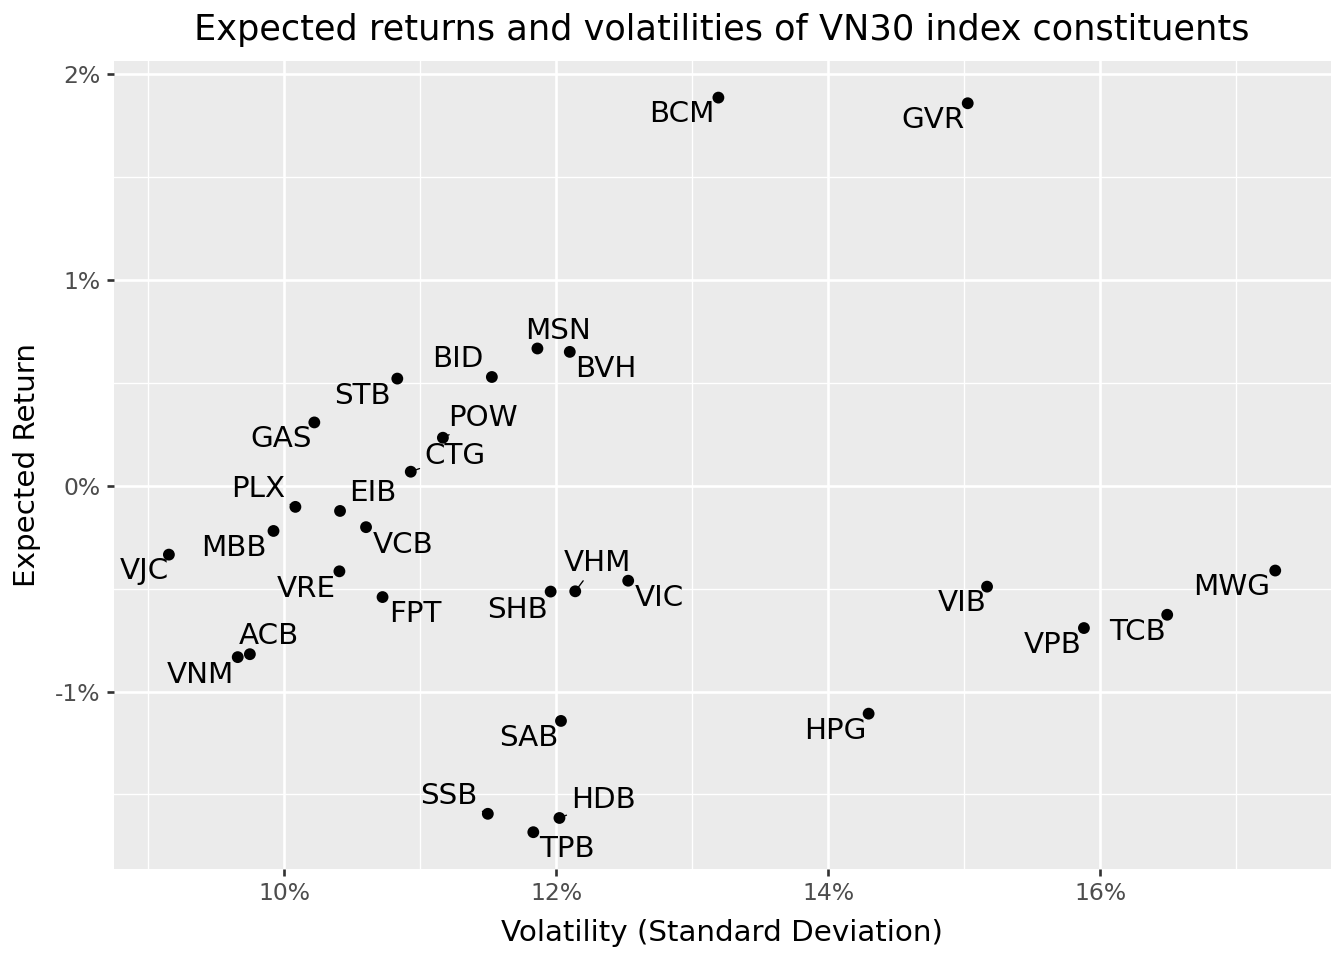

In [8]:
#| label: fig-201
#| fig-cap: Expected returns and volatilities based on monthly returns adjusted for dividend payments and stock splits.
#| fig-alt: 'Title: Expected returns and volatilities of VN30 index constituents. The figure is a scatter plot with volatilities on the horizontal and expected returns on the vertical axis.'
assets_figure = (
  ggplot(
    assets, 
    aes(x="sigma", y="mu", label="symbol")
  )
  + geom_point()
  + geom_text(adjust_text={"arrowprops": {"arrowstyle": "-"}})
  + scale_x_continuous(labels=percent_format())
  + scale_y_continuous(labels=percent_format())
  + labs(
      x="Volatility (Standard Deviation)", 
      y="Expected Return",
      title="Expected returns and volatilities of VN30 index constituents"
  )
)
assets_figure.show()

In [9]:
returns_wide = (returns_monthly
  .pivot(index="date", columns="symbol", values="ret")
  .reset_index()
)

sigma = (returns_wide
  .drop(columns=["date"])
  .cov()
)

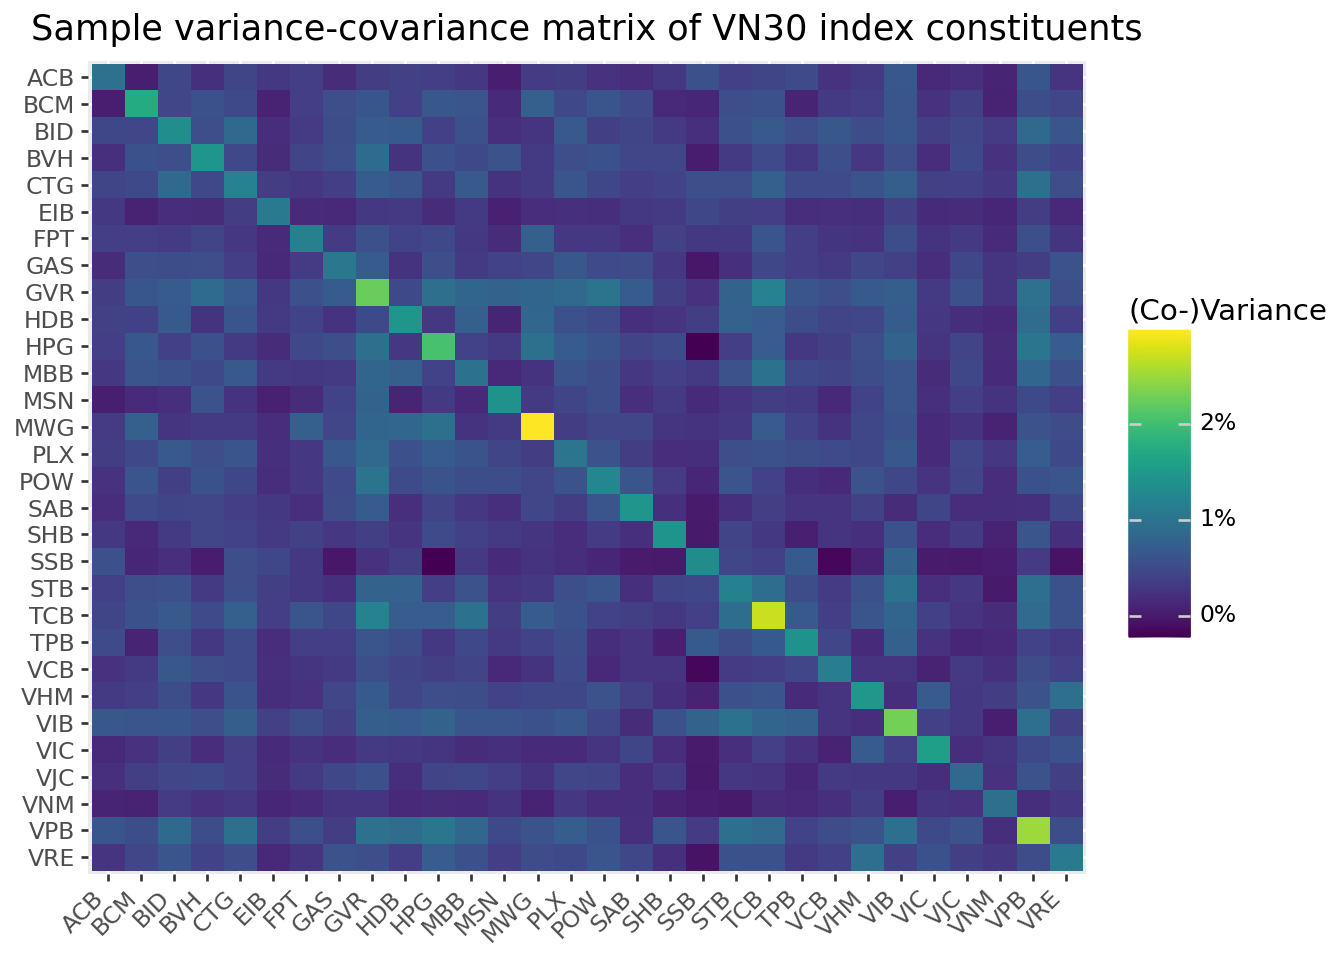

In [10]:
#| label: fig-203
#| fig-cap: Variances and covariances based on monthly returns adjusted for dividend payments and stock splits.
#| fig-alt: 'Title: Variance-covariance matrix of VN30 index constituents. The figure shows 900 tiles with variances and covariances between each constituent-pair.'
sigma_long = (sigma
  .reset_index()
  .melt(id_vars="symbol", var_name="symbol_b", value_name="value")
)

sigma_long["symbol_b"] = pd.Categorical(
  sigma_long["symbol_b"], 
  categories=sigma_long["symbol_b"].unique()[::-1],
  ordered=True
)

sigma_figure = (
  ggplot(
    sigma_long, 
    aes(x="symbol", y="symbol_b", fill="value")
  )
  + geom_tile()
  + labs(
      x="", y="", fill="(Co-)Variance",
      title="Sample variance-covariance matrix of VN30 index constituents"
    )
  + scale_fill_continuous(labels=percent_format())
  + theme(axis_text_x=element_text(angle=45, hjust=1))
)
sigma_figure.show()

In [11]:
iota = np.ones(sigma.shape[0])
sigma_inv = np.linalg.inv(sigma.values)
omega_mvp = (sigma_inv @ iota) / (iota @ sigma_inv @ iota)

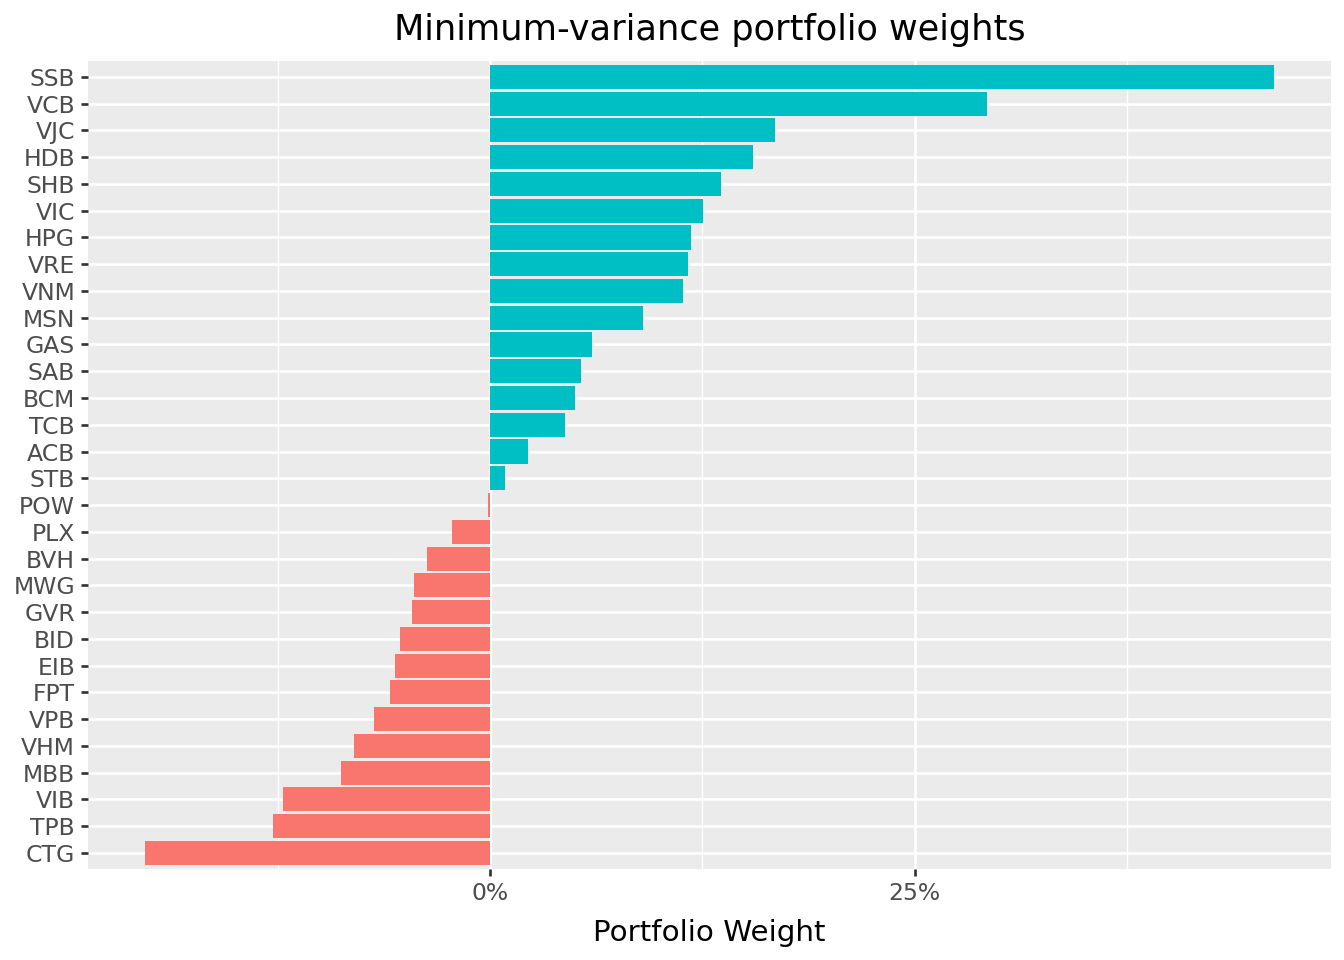

In [12]:
#| label: fig-204
#| fig-cap: Weights are based on historical moments of monthly returns adjusted for dividend payments and stock splits.
#| fig-alt: 'Title: Minimum-variance portfolio weights. The figure shows a bar chart with portfolio weights for each VN30 index constituent.'
assets = assets.assign(omega_mvp=omega_mvp)

assets["symbol"] = pd.Categorical(
  assets["symbol"],
  categories=assets.sort_values("omega_mvp")["symbol"],
  ordered=True
)

omega_figure = (
  ggplot(
    assets,
    aes(y="omega_mvp", x="symbol", fill="omega_mvp>0")
  )
  + geom_col()
  + coord_flip()
  + scale_y_continuous(labels=percent_format())
  + labs(
      x="", 
      y="Portfolio Weight", 
      title="Minimum-variance portfolio weights"
  )
  + theme(legend_position="none")
)
omega_figure.show()

In [13]:
mu = assets["mu"].values
mu_mvp = omega_mvp @ mu
sigma_mvp = np.sqrt(omega_mvp @ sigma.values @ omega_mvp)

summary_mvp = pd.DataFrame({
  "mu": [mu_mvp],
  "sigma": [sigma_mvp],
  "type": ["Minimum-Variance Portfolio"]
})
summary_mvp

,mu,sigma,type
0,-0.011424,0.043512,Minimum-Variance Portfolio


In [14]:
mu_mvp_fmt = f"{mu_mvp:.4f}"
sigma_mvp_fmt = f"{sigma_mvp:.4f}"

In [15]:
mu_bar = assets["mu"].max()
print(f"Target expected return: {mu_bar:.5f}")

Target expected return: 0.01886


In [16]:
C = iota @ sigma_inv @ iota
D = iota @ sigma_inv @ mu
E = mu @ sigma_inv @ mu
lambda_tilde = 2 * (mu_bar - D / C) / (E - (D ** 2) / C)
omega_efp = omega_mvp + (lambda_tilde / 2) * (sigma_inv @ mu - D * omega_mvp)

mu_efp = omega_efp @ mu
sigma_efp = np.sqrt(omega_efp @ sigma.values @ omega_efp)

summary_efp = pd.DataFrame({
  "mu": [mu_efp],
  "sigma": [sigma_efp],
  "type": ["Efficient Portfolio"]
})

/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_label : Removed 30 rows containing missing values.


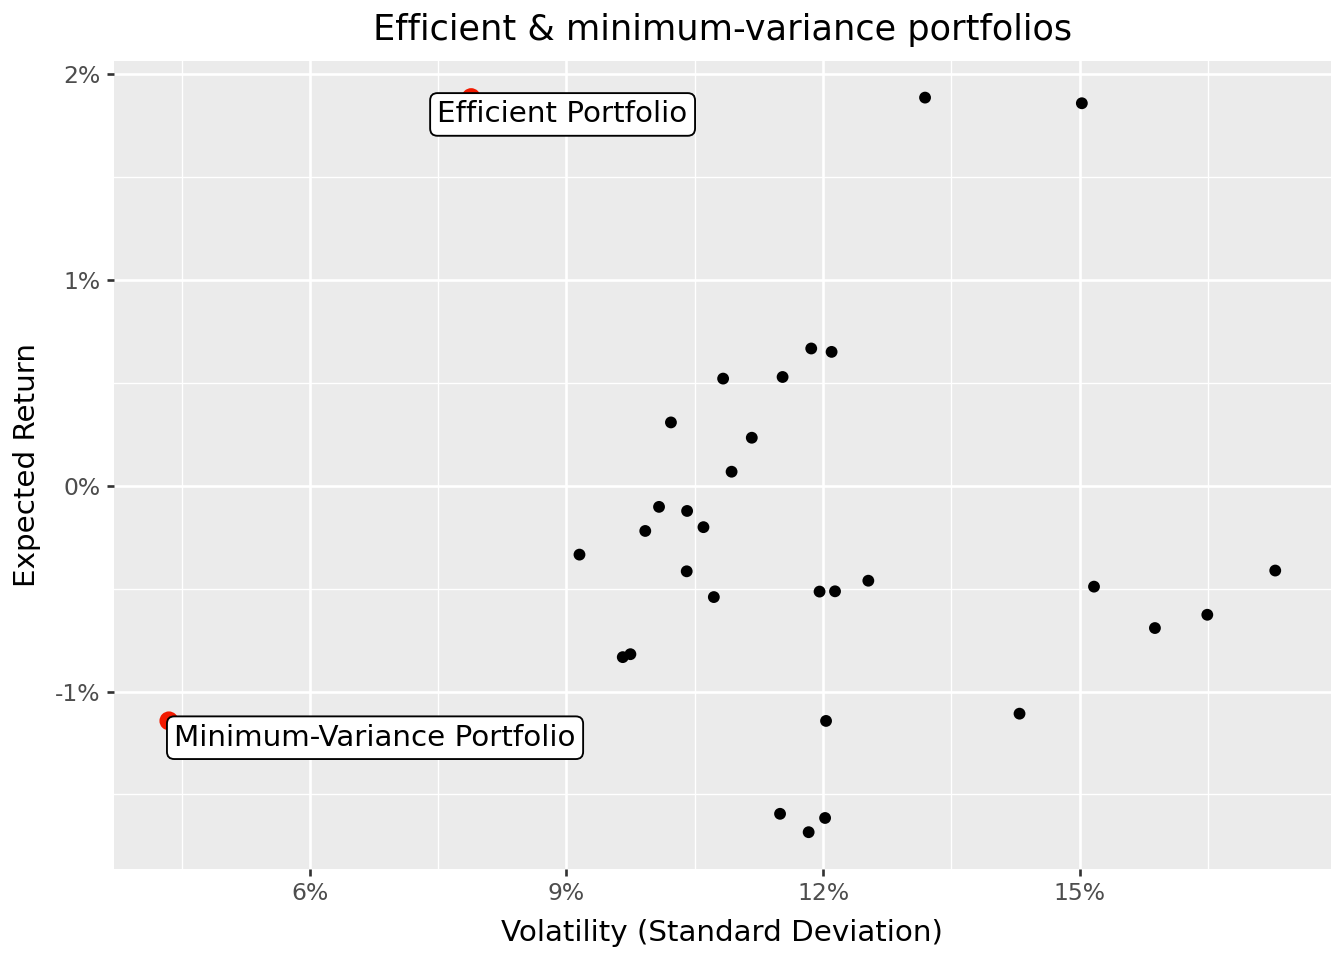

In [17]:
#| label: fig-205
#| fig-cap: The big dots indicate the location of the minimum-variance and the efficient portfolio that delivers the expected return of the stock with the highest return, respectively. The small dots indicate the location of the individual constituents.
#| fig-alt: 'Title: Efficient & minimum-variance portfolios. The figure shows big dots indicating the location of the minimum-variance and the efficient portfolio that delivers the expected return of the stock with the higehst return, respectively. The small dots indicate the location of the individual constituents.'
#| warning: false
summaries = pd.concat(
  [assets, summary_mvp, summary_efp], ignore_index=True
)

summaries_figure = (
  ggplot(
    summaries, 
    aes(x="sigma", y="mu")
  )
  + geom_point(data=summaries.query("type.isna()"))
  + geom_point(data=summaries.query("type.notna()"), color="#F21A00", size=3)
  + geom_label(aes(label="type"), adjust_text={"arrowprops": {"arrowstyle": "-"}})
  + scale_x_continuous(labels=percent_format())
  + scale_y_continuous(labels=percent_format())
  + labs(
      x="Volatility (Standard Deviation)", 
      y="Expected Return",
      title="Efficient & minimum-variance portfolios"
    ) 
)
summaries_figure.show()

In [18]:
efficient_frontier = (
  pd.DataFrame({
    "a": np.arange(-1, 2.01, 0.01)
  })
  .assign(
    omega=lambda x: x["a"].map(lambda a: a * omega_efp + (1 - a) * omega_mvp)
  )
  .assign(
    mu=lambda x: x["omega"].map(lambda w: w @ mu),
    sigma=lambda x: x["omega"].map(lambda w: np.sqrt(w @ sigma @ w))
  )
)

/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_label : Removed 331 rows containing missing values.


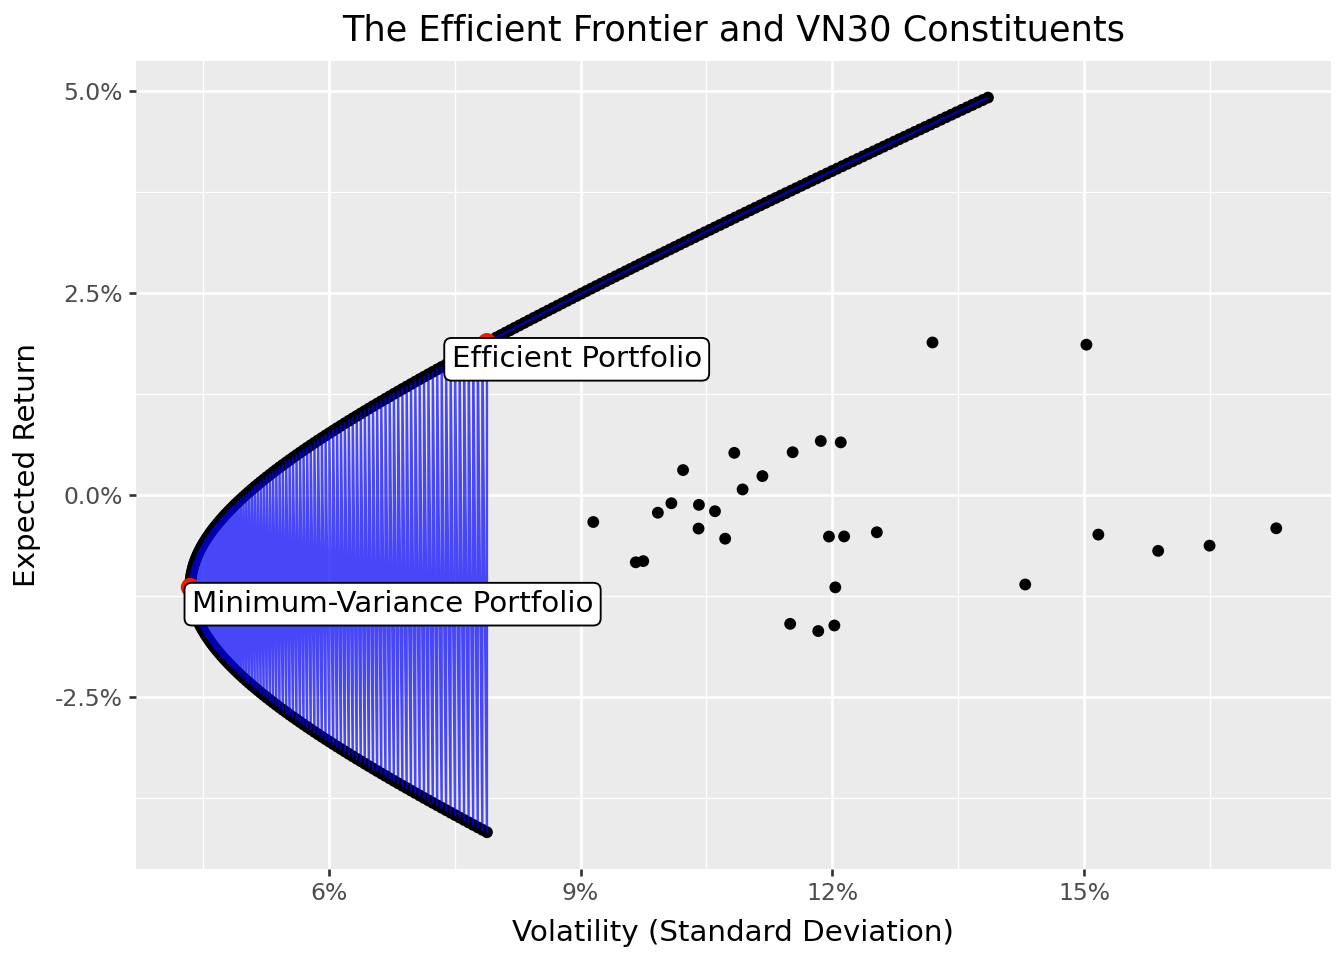

In [19]:
#| label: fig-206
#| fig-cap: The big dots indicate the location of the minimum-variance and the efficient portfolio. The small dots indicate the location of the individual constituents.
#| fig-alt: 'Title: Efficient frontier constructed from historical data for VN30 index constituents. The figure shows VN30 index constituents in a mean-variance diagram. A hyperbola indicates the efficient frontier of portfolios that dominate the individual holdings in the sense that they deliver higher expected returns for the same level of volatility.'
#| warning: false
summaries = pd.concat(
  [summaries, efficient_frontier], ignore_index=True
)

summaries_figure = (
  ggplot(
    summaries, 
    aes(x="sigma", y="mu")
  )
  + geom_point(data=summaries.query("type.isna()"))
  + geom_line(data=efficient_frontier, color="blue", alpha=0.7)
  + geom_point(data=summaries.query("type.notna()"), color="#F21A00", size=3)
  + geom_label(aes(label="type"), adjust_text={"arrowprops": {"arrowstyle": "-"}})
  + scale_x_continuous(labels=percent_format())
  + scale_y_continuous(labels=percent_format())
  + labs(
      x="Volatility (Standard Deviation)", 
      y="Expected Return",
      title="The Efficient Frontier and VN30 Constituents"
    ) 
)
summaries_figure.show()